In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
 


In [5]:
dataset = pd.read_csv('train.csv') 

In [6]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
dataset.shape

(614, 13)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
pd.crosstab(dataset['Credit_History'], dataset ['Loan_Status'],margins= True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<AxesSubplot:>

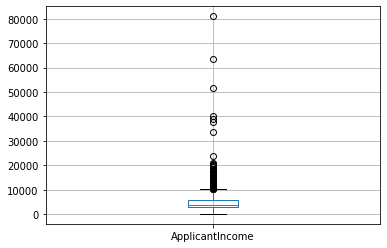

In [11]:
dataset.boxplot(column='ApplicantIncome')

<AxesSubplot:>

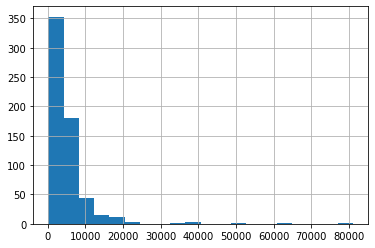

In [12]:
dataset['ApplicantIncome'].hist(bins=20)

<AxesSubplot:>

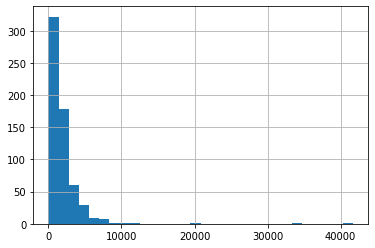

In [13]:
dataset['CoapplicantIncome'].hist(bins=30)

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

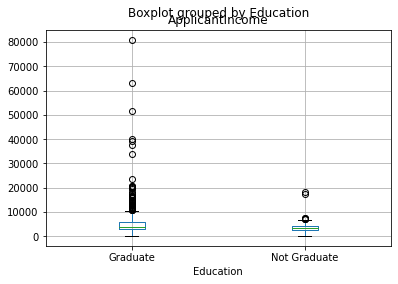

In [14]:
dataset.boxplot(column='ApplicantIncome',by= 'Education')

<AxesSubplot:>

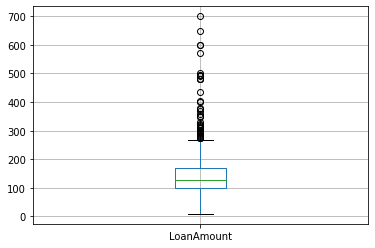

In [15]:
dataset.boxplot(column='LoanAmount')

<AxesSubplot:>

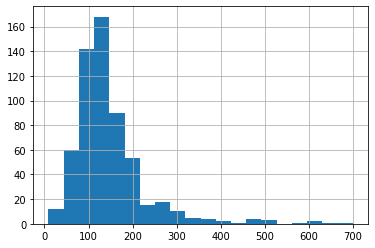

In [16]:
dataset['LoanAmount'].hist(bins=20)

<AxesSubplot:>

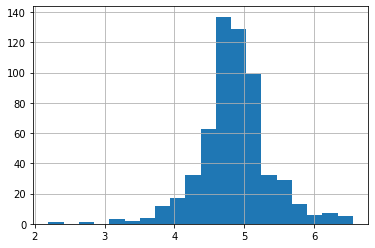

In [17]:
dataset['LoanAmount_log']=np.log(dataset['LoanAmount'])
dataset['LoanAmount_log'].hist(bins=20)

In [18]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [19]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0],inplace=True)

In [20]:
dataset['Married'].fillna(dataset['Married'].mode()[0],inplace=True)

In [21]:
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0],inplace=True)

In [22]:
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0],inplace=True)

In [23]:
dataset.LoanAmount =dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_log =dataset.LoanAmount.fillna(dataset.LoanAmount_log.mean())

In [24]:
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0],inplace=True)

In [25]:
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0],inplace=True)

In [26]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [27]:
dataset['TotalIncome']= dataset['ApplicantIncome']+ dataset['CoapplicantIncome']
dataset['TotalIncome_log']= np.log(dataset['TotalIncome'])

<AxesSubplot:>

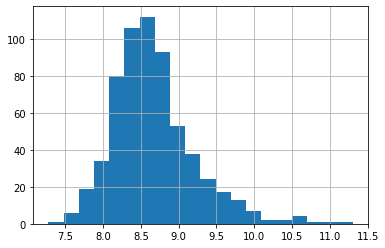

In [28]:
dataset['TotalIncome_log'].hist(bins=20)

In [29]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,146.412162,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,128.000000,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,66.000000,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,120.000000,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,141.000000,6000.0,8.699515


In [30]:
X= dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
y=dataset.iloc[:,12].values

In [31]:
X

array([['Male', 'No', '0', ..., 1.0, 146.41216216216216, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 128.0, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 66.0, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 253.0, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 187.0, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 133.0, 4583.0]], dtype=object)

In [32]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
print (X_train)

[['Male' 'Yes' '0' ... 1.0 131.0 5858.0]
 ['Male' 'No' '1' ... 1.0 196.0 11250.0]
 ['Male' 'Yes' '0' ... 0.0 149.0 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 200.0 8334.0]
 ['Male' 'Yes' '0' ... 1.0 160.0 6033.0]
 ['Female' 'Yes' '0' ... 1.0 182.0 6486.0]]


In [35]:
from sklearn.preprocessing import LabelEncoder
Labelencoder_X =LabelEncoder()

In [36]:
for i in range(0,5):
    X_train[:,i] =Labelencoder_X.fit_transform(X_train[:,i])

In [37]:
X_train[:,7] = Labelencoder_X.fit_transform(X_train[:,7])

In [38]:
X_train

array([[1, 1, 0, ..., 1.0, 131.0, 267],
       [1, 0, 1, ..., 1.0, 196.0, 407],
       [1, 1, 0, ..., 0.0, 149.0, 249],
       ...,
       [1, 1, 3, ..., 1.0, 200.0, 363],
       [1, 1, 0, ..., 1.0, 160.0, 273],
       [0, 1, 0, ..., 1.0, 182.0, 301]], dtype=object)

In [39]:
Labelencoder_y = LabelEncoder()
y_train = Labelencoder_y.fit_transform(y_train)

In [40]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [41]:
for i in range(0,5):
    X_test[:,i] = Labelencoder_X.fit_transform(X_test[:,i])

In [42]:
X_test[:,7] = Labelencoder_X.fit_transform(X_test[:,7])

In [43]:
Labelencoder_y = LabelEncoder()
y_test = Labelencoder_y.fit_transform(y_test)

In [44]:
X_test

array([[1, 0, 0, 0, 5, 1.0, 84.0, 85],
       [0, 0, 0, 0, 5, 1.0, 112.0, 28],
       [1, 1, 0, 0, 5, 1.0, 324.0, 104],
       [1, 1, 0, 0, 5, 1.0, 110.0, 80],
       [1, 1, 2, 0, 5, 1.0, 97.0, 22],
       [1, 1, 0, 1, 3, 0.0, 165.0, 70],
       [1, 1, 3, 0, 3, 1.0, 157.0, 77],
       [1, 0, 0, 0, 5, 1.0, 405.0, 114],
       [1, 0, 0, 0, 5, 0.0, 124.0, 53],
       [1, 1, 0, 0, 5, 1.0, 128.0, 55],
       [0, 0, 0, 0, 5, 1.0, 84.0, 4],
       [1, 1, 1, 0, 5, 1.0, 95.0, 2],
       [0, 0, 0, 0, 5, 1.0, 280.0, 96],
       [1, 1, 2, 0, 5, 1.0, 236.0, 97],
       [1, 1, 0, 0, 5, 1.0, 96.0, 117],
       [1, 1, 1, 0, 5, 1.0, 67.0, 22],
       [1, 0, 1, 1, 5, 1.0, 190.0, 32],
       [1, 0, 0, 1, 5, 1.0, 132.0, 25],
       [0, 0, 0, 0, 5, 1.0, 93.0, 1],
       [1, 1, 0, 1, 5, 0.0, 181.0, 44],
       [0, 1, 0, 0, 5, 0.0, 120.0, 71],
       [1, 1, 0, 0, 5, 1.0, 143.0, 43],
       [1, 1, 2, 0, 5, 1.0, 108.0, 91],
       [1, 1, 2, 0, 5, 1.0, 165.0, 111],
       [1, 1, 0, 0, 5, 1.0, 58.0, 35],
       

In [45]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

In [46]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [47]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier = DecisionTreeClassifier (criterion='entropy', random_state= 0)
DTClassifier.fit (X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [48]:
y_pred = DTClassifier.predict(X_test)
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [49]:
from sklearn import metrics 
print ('the accuracy of decision tree is :', metrics.accuracy_score(y_pred,y_test))

the accuracy of decision tree is : 0.7073170731707317


In [50]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit (X_train,y_train)

GaussianNB()

In [51]:
y_pred =NBClassifier.predict(X_test)

In [52]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [53]:
print ('the accuracy of Naive  Bayes is :', metrics.accuracy_score(y_pred,y_test))

the accuracy of Naive  Bayes is : 0.8292682926829268


In [54]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('dark')

In [55]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,146.412162,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,128.000000,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,66.000000,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,120.000000,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,141.000000,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,71.000000,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,40.000000,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,253.000000,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,187.000000,7583.0,8.933664


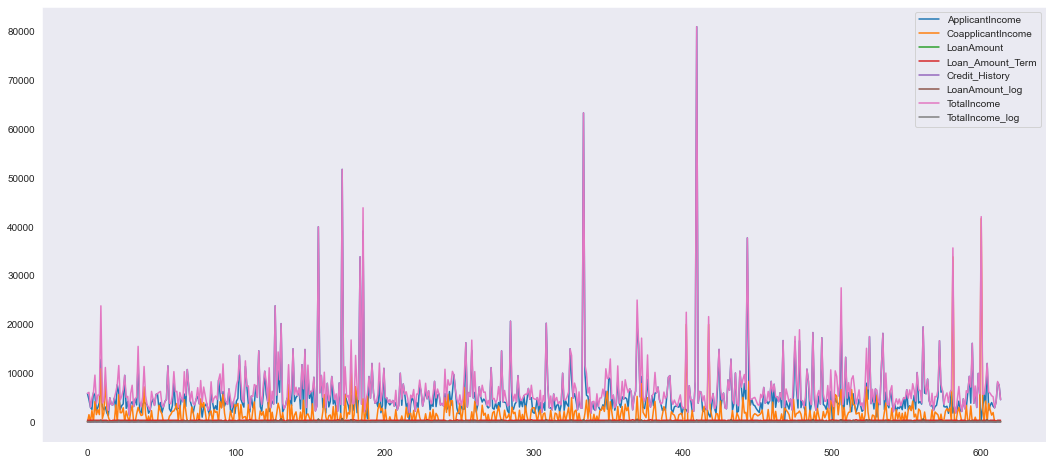

In [56]:
dataset.plot(figsize=(18, 8))

plt.show()

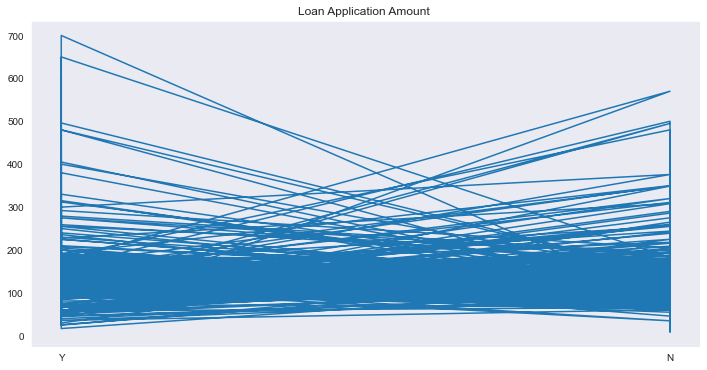

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(dataset['Loan_Status'], dataset['LoanAmount'])
plt.title("Loan Application Amount ")
plt.show()

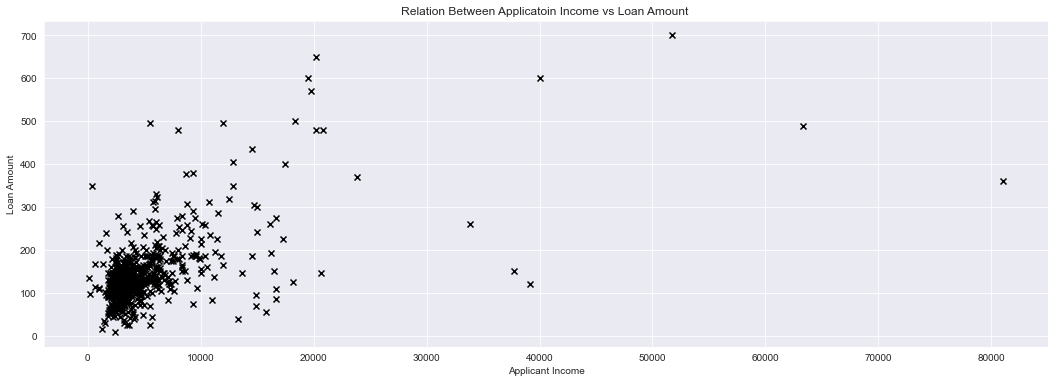

In [58]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicatoin Income vs Loan Amount ")

plt.grid()
plt.scatter(dataset['ApplicantIncome'] , dataset['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

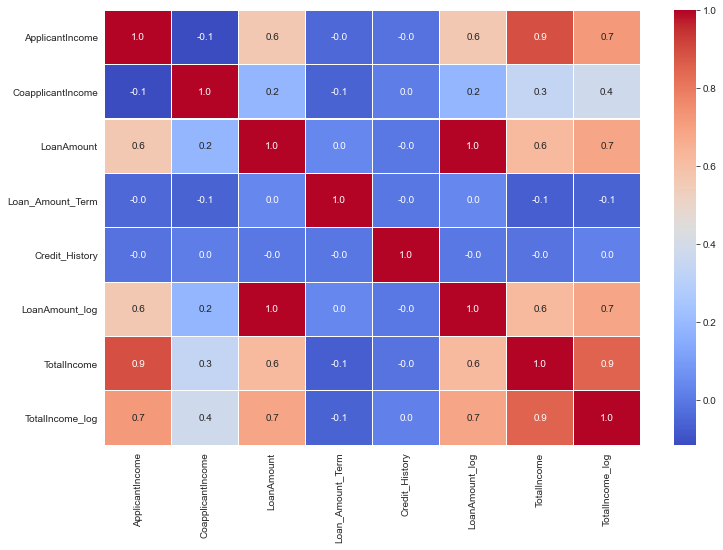

In [59]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

<AxesSubplot:>

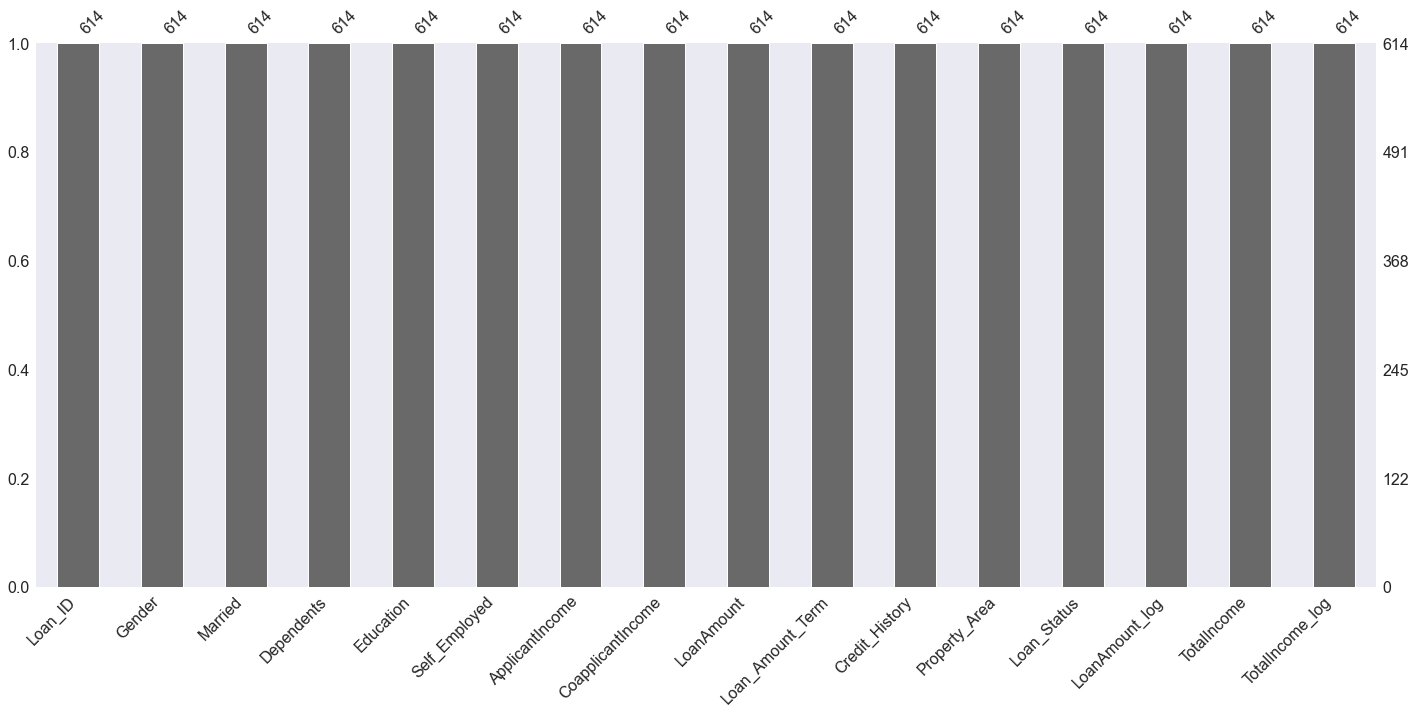

In [60]:
import missingno as msno
msno.bar(dataset)